![ups logo](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png/640px-Logo_Universidad_Polit%C3%A9cnica_Salesiana_del_Ecuador.png)

# Inteligencia Artificial

# Practica 05

## Aplicaciones de las Redes Bayesianas como herramientas de soporte a la toma de decisiones. Despliegue de servicios de Inteligencia Artificial

### Autor: Diego Tapia

## Desarrollo

#### Esta practica se divide en siete partes:

1. **Fase de preparación**

2. Fase de modelado: Red Neuronal

3. Fase de modelado: Naive Bayes

4. Comparacion de modelos

5. Fase de predicción de nuevos samples (Red Neuronal y Naive Bayes)

6. Proyecto en Django Framework

7. Despliegue del proyecto



## 1. Fase de Preparación

Análisis de frecuencia de clases, estadística descriptiva, análisis de correlaciones, transformación de variables

### Descripción del Dataset

Nombre del dataset: Bank Marketing

Enlace : https://archive.ics.uci.edu/dataset/222/bank+marketing

Descripción:

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo fijo (variable y).

**Numero de variables: 17**

**Numero de instacias: 45211**

Descripción de las variables:

Variables de entrada: 

Datos del cliente bancario: 

1 - Edad (numérico)

2 - Trabajo: tipo de trabajo (categórico: "admin.", "desconocido", "desempleado", "directivo", "ama de casa", "emprendedor", "estudiante", "trabajador manual", "autónomo", "jubilado", "técnico", "servicios")

3 - Estado civil: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)

4 - Educación (categórico: "desconocido", "secundaria", "primaria", "terciaria")

5 - Incumplimiento: ¿tiene crédito en incumplimiento? (binario: "sí", "no")

6 - Saldo: saldo promedio anual, en euros (numérico)

7 - Vivienda: ¿tiene préstamo hipotecario? (binario: "sí", "no")

8 - Préstamo: ¿tiene préstamo personal? (binario: "sí", "no")

Relacionado con el último contacto de la campaña actual: 9 - Contacto: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")

10 - Día: último día de contacto del mes (numérico)

11 - Mes: último mes de contacto del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")

12 - Duración: duración del último contacto, en segundos (numérico)

Otros atributos: 

13 - Campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)

14 - Pdays: número de días que transcurrieron después de que el cliente fue contactado por última vez en una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)

15 - Anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)

16 - ResultadoPrevio: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

Variable de salida (objetivo deseado): 17 - y - ¿el cliente ha suscrito un depósito a plazo fijo? (binario: "sí", "no")


### Carga del dataset



In [104]:
# Importacion de librerias

#%pip install scikeras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import set_config

print("Módulos y clases importados")

Módulos y clases importados


In [105]:
# Cargar dataframe desde url de csv alojado en repositorio de github
url_dataframe = 'https://raw.githubusercontent.com/juandtap/IA_practica_05/master/Datasets/bank-full.csv'
# el separador es una (;) y la primera fila son los encabezados (header= 0)
dfOriginal = pd.read_csv(url_dataframe, sep=';', header=0)
dataframe = copy.deepcopy(dfOriginal)
print("Tamaño del dataset: "+str(dataframe.shape[0])+" filas x "+str(dataframe.shape[1])+" columnas")
# Se muestran las 10 primeros registros
dataframe.head(10)

Tamaño del dataset: 45211 filas x 17 columnas


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Información del dataset

In [106]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Formato a las variables

Algunas variables tiene los valores de "yes" y "no" , para un mejor manejo de los datos, estos se convertiran a un formato binario

"no" = 0

"yes = 1

In [107]:
dataframe['default'] = dataframe['default'].map({'yes' : 1, 'no' : 0})
dataframe['housing'] = dataframe['housing'].map({'yes' : 1, 'no' : 0})
dataframe['loan'] = dataframe['loan'].map({'yes' : 1, 'no' : 0})
dataframe['y'] = dataframe['y'].map({'yes' : 1, 'no' : 0}) # Variable de salida
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


### Eliminación de variables

La variable 'pdays' que representa el número de días que transcurrieron después de que el cliente fue contactado por última vez en una campaña anterior presenta varios datos con **-1**, esto significa que el cliente no fue contactado previamente.

Al contar los valores podemos ver que la mayoria de datos son -1. 

In [108]:
dataframe['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

Tambien en las medidas de dispersion (Cuartiles) podemos ver que la mayoria de datos tienen -1.

In [109]:
dataframe['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

La variable 'pdays 'es eliminada

In [110]:
dataframe.drop('pdays', axis=1, inplace=True)
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0,unknown,0


Si analizamos la variable 'default' podemos ver que la mayoria de datos son 0 ('No')

In [111]:
dataframe['default'].value_counts()

default
0    44396
1      815
Name: count, dtype: int64

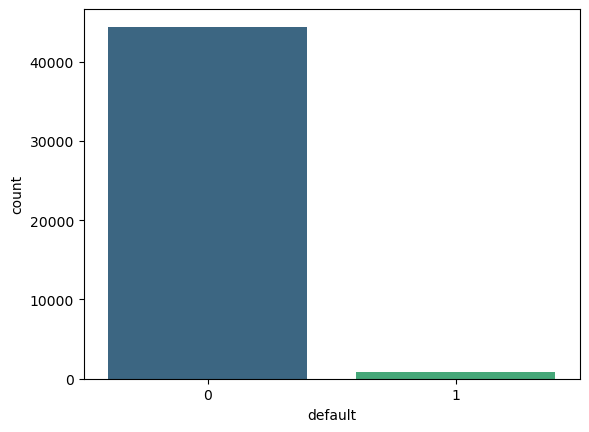

In [112]:
sns.countplot(x=dataframe['default'], palette='viridis')
plt.show()

Si calculamos el porcentaje podemos ver que solo el 1.8% de los datos, son 1s (Yes)

In [113]:
porcentaje_default = dataframe['default'].value_counts(normalize=True) * 100

print(porcentaje_default)

default
0    98.197341
1     1.802659
Name: proportion, dtype: float64


Se elimina la variable 'Default'

In [114]:
dataframe.drop('default', axis=1, inplace=True)
dataframe.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,1,0,unknown,5,may,261,1,0,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,5,may,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,5,may,76,1,0,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,5,may,92,1,0,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,5,may,198,1,0,unknown,0


### Análisis de frecuencia de clases

Se realiza una analisis de frecuencias de clase con las variables categoricas.

In [115]:
# Se obtiene las variables categoricas, todas las que son de tipo object
columnas_categoricas = list(dataframe.select_dtypes(include=['object']).columns)
print(columnas_categoricas)

['job', 'marital', 'education', 'contact', 'month', 'poutcome']


#### Variable: Job (Trabajo)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

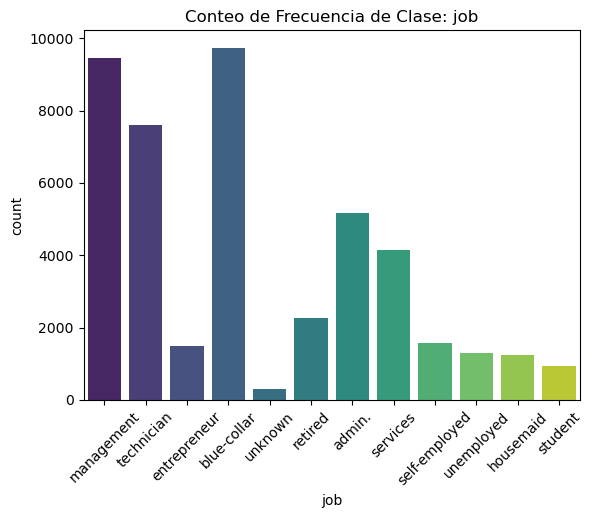

In [116]:
# Variable: JOB
categoria = 'job'
sns.countplot(x=dataframe[categoria], palette='viridis')
plt.title(f'Conteo de Frecuencia de Clase: {categoria}')
plt.xticks(rotation=45)
dataframe[categoria].value_counts()

#### Variable: marital (Estado civil)

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

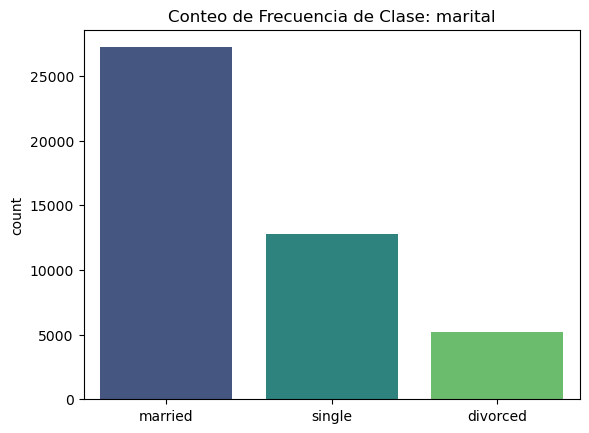

In [117]:
# Variable: marital
categoria = 'marital'
sns.countplot(x=dataframe[categoria], palette='viridis')
plt.title(f'Conteo de Frecuencia de Clase: {categoria}')
plt.xlabel("")
dataframe[categoria].value_counts()

#### Variable: education (Educacion)

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

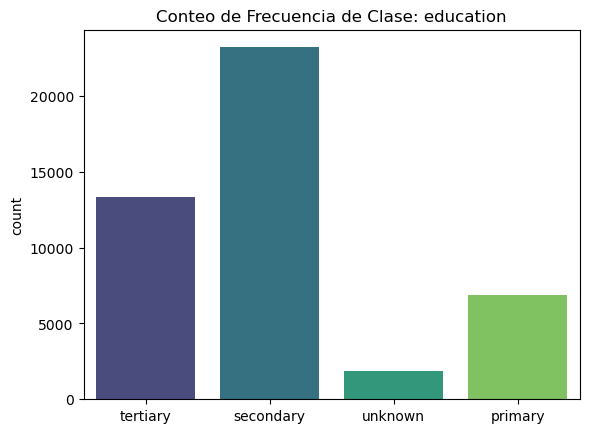

In [118]:
# Variable: education
categoria = 'education'
sns.countplot(x=dataframe[categoria], palette='viridis')
plt.title(f'Conteo de Frecuencia de Clase: {categoria}')
plt.xlabel("")
dataframe[categoria].value_counts()

#### Variable: contact (Medio de contacto)

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

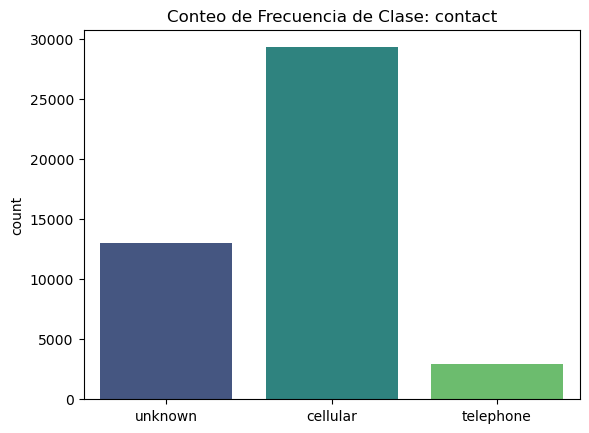

In [119]:
# Variable: contact
categoria = 'contact'
sns.countplot(x=dataframe[categoria], palette='viridis')
plt.title(f'Conteo de Frecuencia de Clase: {categoria}')
plt.xlabel("")
dataframe[categoria].value_counts()

#### Variable: month (Mes)

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

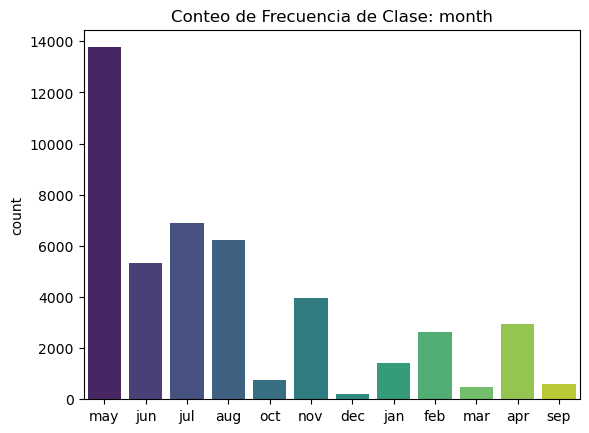

In [120]:
# Variable: month
categoria = 'month'
sns.countplot(x=dataframe[categoria], palette='viridis')
plt.title(f'Conteo de Frecuencia de Clase: {categoria}')
plt.xlabel("")
dataframe[categoria].value_counts()

La variable 'month' se considera irrelevante para nuestro analisis. Esta variable es eliminada.

In [121]:
dataframe.drop('month', axis=1, inplace=True)
dataframe.head()

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,1,0,unknown,5,261,1,0,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,5,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,5,76,1,0,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,5,92,1,0,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,5,198,1,0,unknown,0


#### Variable: poutcome (resultado de la campaña de marketing anterior )

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

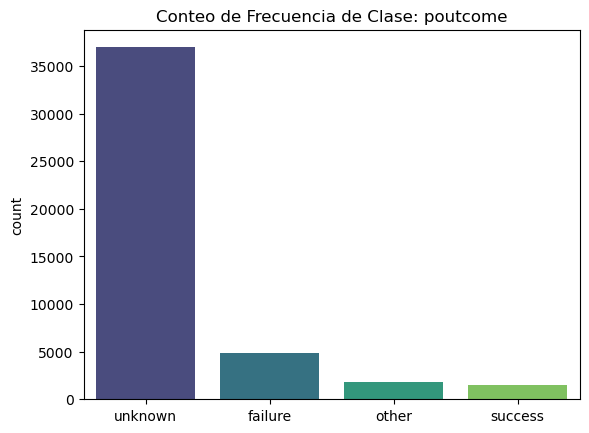

In [122]:
# Variable: poutcome 
categoria = 'poutcome'
sns.countplot(x=dataframe[categoria], palette='viridis')
plt.title(f'Conteo de Frecuencia de Clase: {categoria}')
plt.xlabel("")
dataframe[categoria].value_counts()

### Estadística descriptiva

Se presentan un resumen estadistico (medidas de tendencia centrar y de dispersion) junto con graficos de distribucion de frecuencias  de las variables numericas

#### Variable: age (Edad)

In [123]:
variablenum = 'age'
variablenum_esp ='Edad'

dataframe[variablenum].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

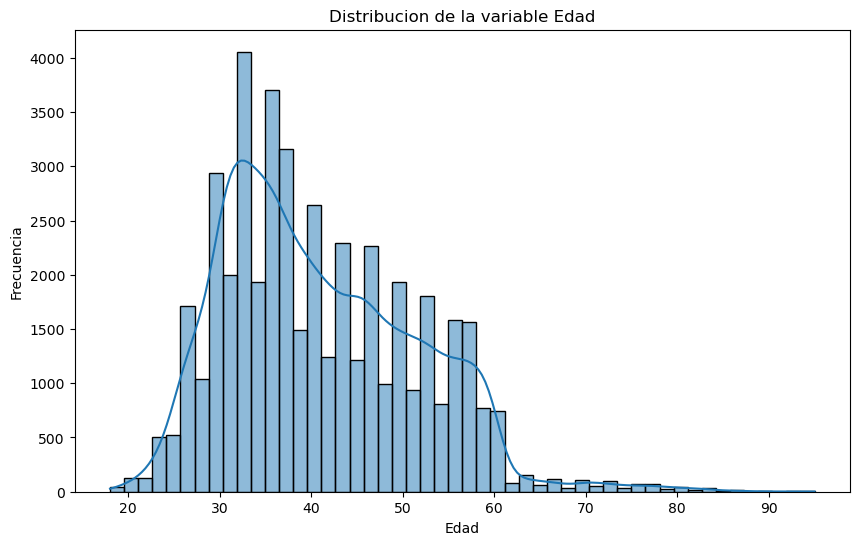

In [124]:

plt.figure(figsize=(10, 6))

ax = sns.histplot(dataframe[variablenum], bins=50, kde=True)

plt.title(f'Distribucion de la variable {variablenum_esp}')
plt.xlabel(variablenum_esp)
plt.ylabel('Frecuencia')

plt.show()

#### Variable: balance (Saldo)

In [125]:
variablenum = 'balance'
variablenum_esp ='Saldo'

dataframe[variablenum].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

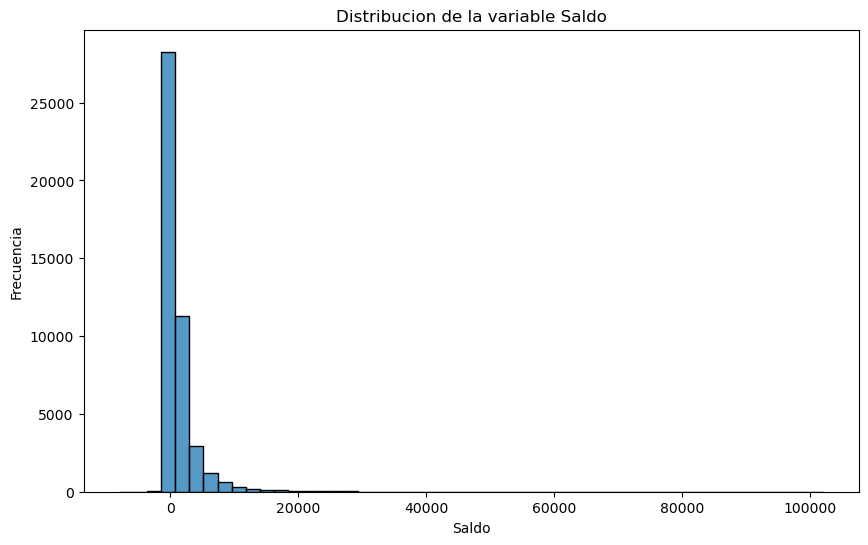

In [126]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(dataframe[variablenum], bins=50, kde=False)

plt.title(f'Distribucion de la variable {variablenum_esp}')
plt.xlabel(variablenum_esp)
plt.ylabel('Frecuencia')

plt.show()

#### Variable: housing (Prestamo hipotecario 1=Si, 0=No)


In [127]:
variablenum = 'housing'
variablenum_esp ='Hipoteca'

dataframe[variablenum].describe()

count    45211.000000
mean         0.555838
std          0.496878
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: housing, dtype: float64

housing
1    25130
0    20081
Name: count, dtype: int64

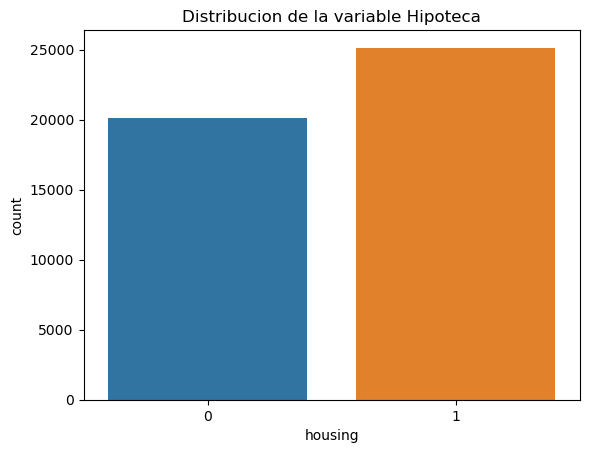

In [128]:
sns.countplot(x=dataframe[variablenum])
plt.title(f"Distribucion de la variable {variablenum_esp}")
dataframe[variablenum].value_counts()


#### Variable: loan (Prestamo personal 1=Si, 0=No)


In [129]:
variablenum = 'loan'
variablenum_esp ='Prestamo'

dataframe[variablenum].describe()

count    45211.000000
mean         0.160226
std          0.366820
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan, dtype: float64

loan
0    37967
1     7244
Name: count, dtype: int64

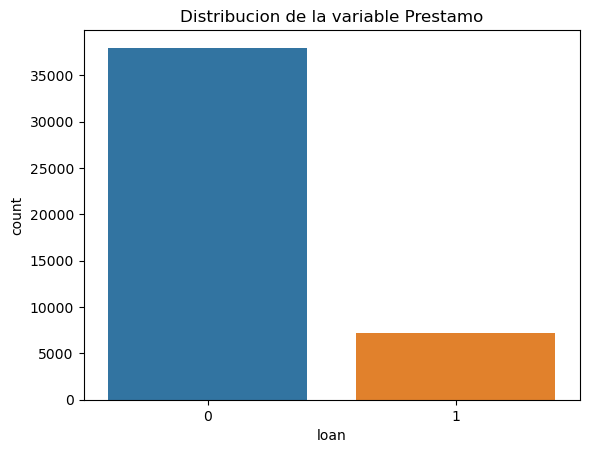

In [130]:
sns.countplot(x=dataframe[variablenum])
plt.title(f"Distribucion de la variable {variablenum_esp}")
dataframe[variablenum].value_counts()

#### Variable: day (último día de contacto del mes )

In [131]:
variablenum = 'day'
variablenum_esp ='Dia'

dataframe[variablenum].describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

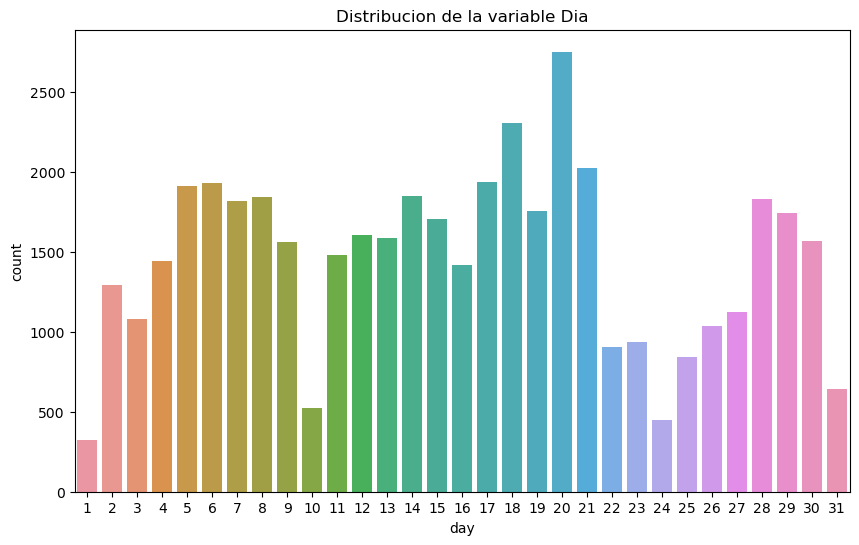

In [132]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dataframe[variablenum])
plt.title(f"Distribucion de la variable {variablenum_esp}")
dataframe[variablenum].value_counts()

#### Variable: duration (Duracion en segundos de la llamada)

In [133]:
variablenum = 'duration'
variablenum_esp ='Duración'

dataframe[variablenum].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

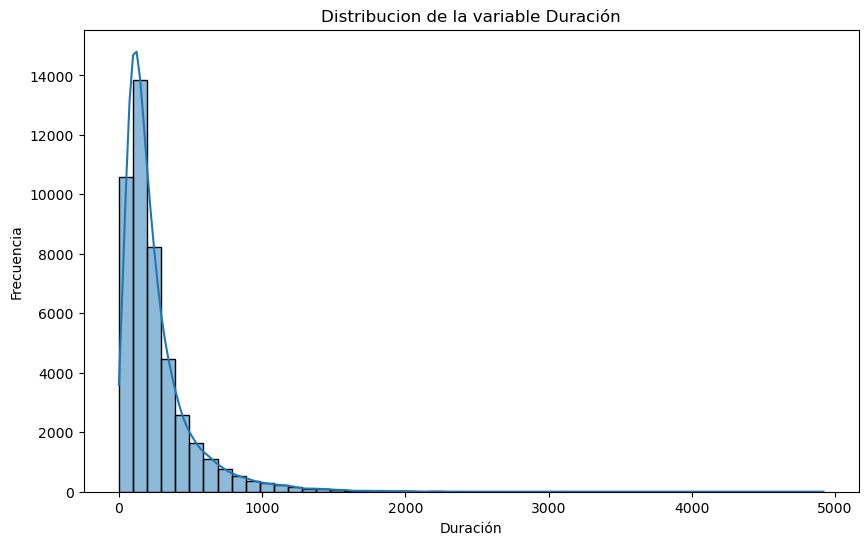

In [134]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(dataframe[variablenum], bins=50, kde=True)

plt.title(f'Distribucion de la variable {variablenum_esp}')
plt.xlabel(variablenum_esp)
plt.ylabel('Frecuencia')

plt.show()

#### Variable: campaign (Campaña: número de contactos realizados durante la ultima campaña )

In [135]:
variablenum = 'campaign'
variablenum_esp ='Campaña'

dataframe[variablenum].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

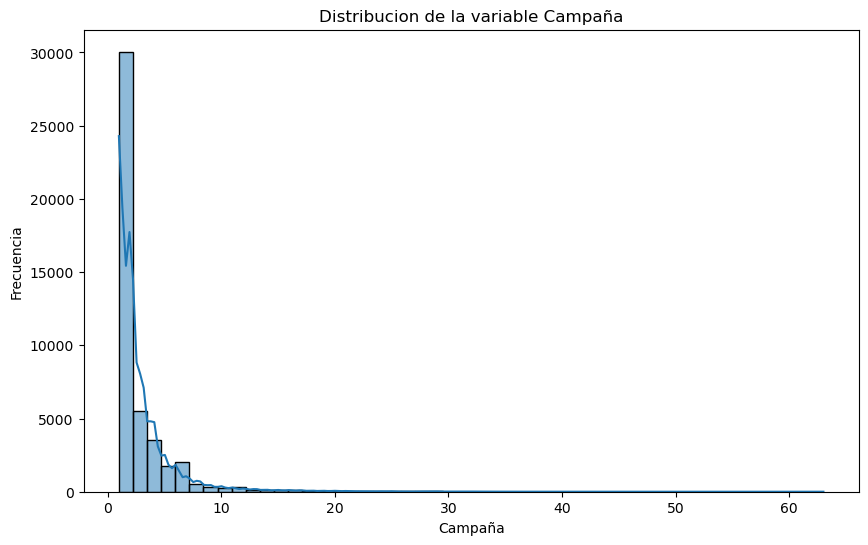

In [136]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(dataframe[variablenum], bins=50, kde=True)

plt.title(f'Distribucion de la variable {variablenum_esp}')
plt.xlabel(variablenum_esp)
plt.ylabel('Frecuencia')

plt.show()

#### Variable: previous (Anterior: número de contactos realizados antes de esta campaña)

In [137]:
variablenum = 'previous'
variablenum_esp ='Contactos Anteriores'

dataframe[variablenum].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

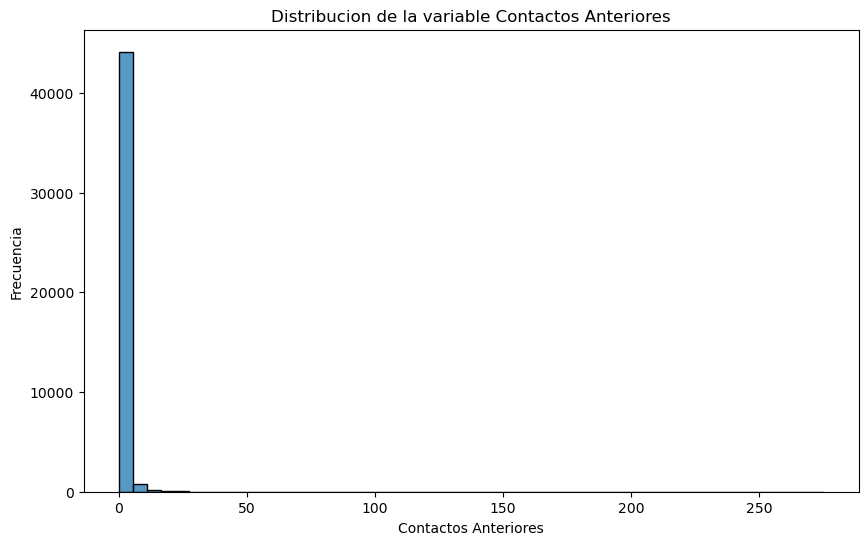

In [138]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(dataframe[variablenum], bins=50, kde=False)

plt.title(f'Distribucion de la variable {variablenum_esp}')
plt.xlabel(variablenum_esp)
plt.ylabel('Frecuencia')

plt.show()

La variable previus tiene muchos datos con valor 0, esta variable es eliminada.

In [139]:
dataframe.drop('previous', axis=1, inplace=True)
dataframe.head()

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,poutcome,y
0,58,management,married,tertiary,2143,1,0,unknown,5,261,1,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,5,151,1,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,5,76,1,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,5,92,1,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,5,198,1,unknown,0


#### Variable de salida 

La variable de salida "y" es renombrada a "result" por comodidad

In [140]:
dataframe.rename(columns={'y':'result'}, inplace=True)
dataframe.head()

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,poutcome,result
0,58,management,married,tertiary,2143,1,0,unknown,5,261,1,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,5,151,1,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,5,76,1,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,5,92,1,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,5,198,1,unknown,0


Análisis descriptivo variable de salida **result**

In [141]:
variablenum = 'result'
variablenum_esp ='Resultado'

dataframe[variablenum].describe()

count    45211.000000
mean         0.116985
std          0.321406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: result, dtype: float64

result
0    39922
1     5289
Name: count, dtype: int64

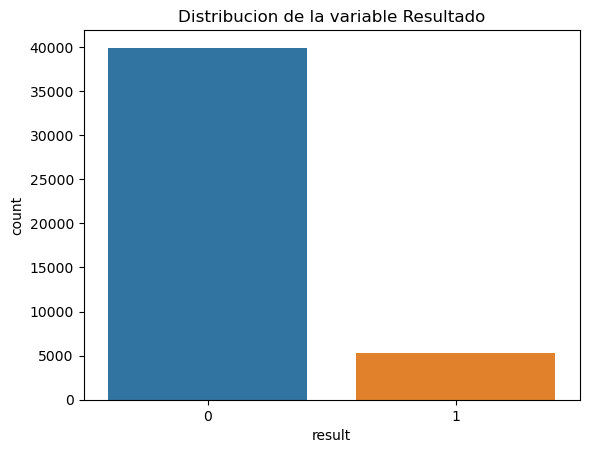

In [142]:
sns.countplot(x=dataframe[variablenum])
plt.title(f"Distribucion de la variable {variablenum_esp}")
dataframe[variablenum].value_counts()

### Analisis de correlacion inicial

En esta subsección se realiza un mapa de calor de las correlaciones entre las **variables numéricas** para identificar las variables más relevantes con respecto a la variable de salida.

In [143]:
dfCorrel = dataframe.corr(numeric_only=True)
dfCorrel.head(10)

,age,balance,housing,loan,day,duration,campaign,result
age,1.000000,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,0.025155
balance,0.097783,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.052838
housing,-0.185513,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,-0.139173
loan,-0.015655,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.068185
day,-0.009120,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.028348
duration,-0.004648,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,0.394521
campaign,0.004760,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.073172
result,0.025155,0.052838,-0.139173,-0.068185,-0.028348,0.394521,-0.073172,1.000000


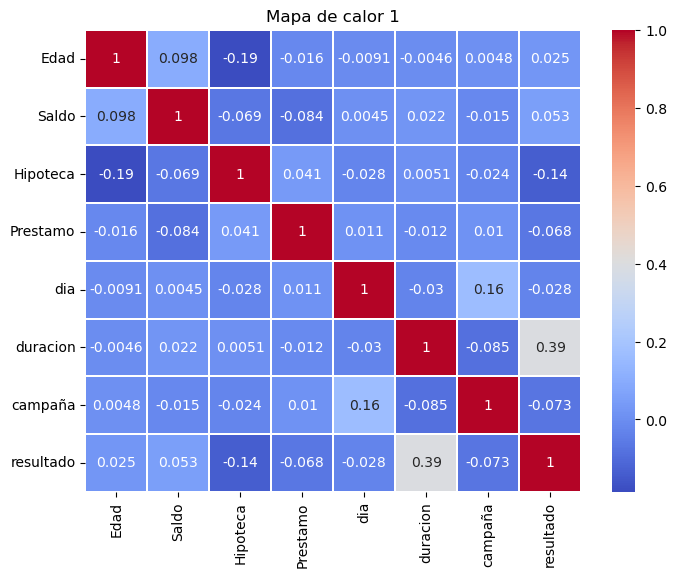

In [144]:
# Graficar Mapa de calor
fig, ax  = plt.subplots(figsize = (8,6))
plt.title("Mapa de calor 1")
sns.heatmap(dfCorrel, cmap= "coolwarm", linewidths = 0.30, annot=True)
# labels en español
nuevas_etiquetas_x = nuevas_etiquetas_y = ['Edad', 'Saldo', 'Hipoteca', 'Prestamo','dia','duracion','campaña', 'resultado']
# cambiar labels
ax.set_xticklabels(nuevas_etiquetas_x, rotation=90)
ax.set_yticklabels(nuevas_etiquetas_y)
plt.show()

A partir del mapa de calor, se observa que la variable 'dia' tiene una correlacion muy baja con respecto a la variable de salida, ademas se considera irrelevante para el analisis.
La variable 'dia' es eliminada.

In [145]:
dataframe.drop('day', axis=1, inplace=True)
dataframe.head()

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,result
0,58,management,married,tertiary,2143,1,0,unknown,261,1,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,151,1,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,76,1,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,92,1,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,198,1,unknown,0


### Transformacion de variables

#### Separación de la variable de salida

In [146]:
#Se separa la variable de salida "Y" para realizar la preparación de datos a las variables independiente "X" 
Y = dataframe['result']
dataframe.drop('result', axis=1, inplace=True)
print(dataframe.shape)
dataframe.head()

(45211, 11)


,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome
0,58,management,married,tertiary,2143,1,0,unknown,261,1,unknown
1,44,technician,single,secondary,29,1,0,unknown,151,1,unknown
2,33,entrepreneur,married,secondary,2,1,1,unknown,76,1,unknown
3,47,blue-collar,married,unknown,1506,1,0,unknown,92,1,unknown
4,33,unknown,single,unknown,1,0,0,unknown,198,1,unknown


#### Análisis de variables

Para buscar las variables categoricas, con la libreria pandas filtramos la columnas que son de tipo "object", no siempre las de este tipo son de tipo categoricas.


In [147]:
# Se obtiene las variables categoricas, todas las que son de tipo object
columnas_categoricas = list(dataframe.select_dtypes(include=['object']).columns)
print(columnas_categoricas)

['job', 'marital', 'education', 'contact', 'poutcome']


In [148]:
# Se obtienen las variables numéricas 
columnas_numericas = list(dataframe.select_dtypes(include=['number']).columns)
print(columnas_numericas)

['age', 'balance', 'housing', 'loan', 'duration', 'campaign']


In [156]:
#Determinación de tipos de variables
categorical_ordinal_features = ['education']
categorical_nominal_features = ['job','marital', 'contact','poutcome']
numeric_features = ['age','balance', 'housing', 'loan', 'duration', 'campaign']
print(f"Variables categoricas ordinales: {categorical_ordinal_features}")
print(f"Variables categoricas nominales: {categorical_nominal_features}")
print(f"Variables numericas: {numeric_features}")

Variables categoricas ordinales: ['education']
Variables categoricas nominales: ['job', 'marital', 'contact', 'poutcome']
Variables numericas: ['age', 'balance', 'housing', 'loan', 'duration', 'campaign']


In [153]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns) 
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [154]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  11
Cantidad de categorías en la variable categórica nominal job : 12
Cantidad de categorías en la variable categórica nominal marital : 3
Cantidad de categorías en la variable categórica nominal contact : 3
Cantidad de categorías en la variable categórica nominal poutcome : 4
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  22
Cantidad de variables que habrá después de la transformación de variables:  29


#### Diseño de transformadores

Se crea preprocesadores y transformadores para llevar un orden y estructura en el proceso de transformación de variables.

In [157]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])

categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida

preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)


#2. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#### Diseño de pipeline
El procesador ‘prepcn’ es indispensable que se aplique antes de los demás preprocesadores numéricos. En el Pipeline “pipe” se aplica primeramente la tansformación de variables categóricas a variables numéricas y en segundo lugar se aplica la transformación numérica.

In [158]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    ('prepstandard', preprocesorStandardScaler)
])

#### Transformación de variables

In [159]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn" 
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1] 
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
#dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";",index = False)
#Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
#dataframeTransformado.to_csv("DatasetTransformado1.csv", sep=";",index = False)
dataframeTransformado.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))]), ['job', 'marital', 'contact', 'poutcome'])
********** Lista de variables:
['education', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'age', 'balance', 'housing', 'loan', 'duration', 'campaign']


,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,housing,loan,duration,campaign,result
0,1.036362,-0.359369,-0.523740,-0.184415,-0.16793,1.944270,-0.2296,-0.190234,-0.318082,-0.145557,...,-0.205972,-0.185948,0.472519,1.606965,0.256419,0.893915,-0.436803,0.011016,-0.569351,0
1,-0.300556,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,...,-0.205972,-0.185948,0.472519,0.288529,-0.437895,0.893915,-0.436803,-0.416127,-0.569351,0
2,-0.300556,-0.359369,-0.523740,5.422561,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,...,-0.205972,-0.185948,0.472519,-0.747384,-0.446762,0.893915,2.289359,-0.707361,-0.569351,0
3,2.373280,-0.359369,1.909346,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,...,-0.205972,-0.185948,0.472519,0.571051,0.047205,0.893915,-0.436803,-0.645231,-0.569351,0
4,2.373280,-0.359369,-0.523740,-0.184415,-0.16793,-0.514332,-0.2296,-0.190234,-0.318082,-0.145557,...,-0.205972,-0.185948,0.472519,-0.747384,-0.447091,-1.118674,-0.436803,-0.233620,-0.569351,0



### Análisis de correlación con transformación de variables


In [160]:
dfCorrel = dataframeTransformado.corr()
dfCorrel.head()

,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,housing,loan,duration,campaign,result
education,1.000000,-0.042508,-0.351744,0.053173,-0.116376,0.426379,-0.094904,0.068619,-0.079529,0.061019,...,0.002446,0.051218,-0.032830,-0.106807,0.064514,-0.090790,-0.048574,0.001935,0.006255,0.066241
job_admin.,-0.042508,1.000000,-0.188216,-0.066273,-0.060349,-0.184835,-0.082511,-0.068364,-0.114309,-0.052308,...,0.010745,0.012056,-0.025940,-0.055717,-0.026726,0.043046,0.030781,-0.015722,-0.021868,0.005637
job_blue-collar,-0.351744,-0.188216,1.000000,-0.096585,-0.087951,-0.269376,-0.120251,-0.099633,-0.166592,-0.076234,...,0.001342,-0.053074,0.022194,-0.044002,-0.048757,0.177475,0.018291,0.009637,0.008986,-0.072083
job_entrepreneur,0.053173,-0.066273,-0.096585,1.000000,-0.030969,-0.094850,-0.042342,-0.035082,-0.058659,-0.026843,...,-0.013506,-0.019111,0.014901,0.021792,0.009642,0.010600,0.039808,-0.001327,0.002128,-0.019662
job_housemaid,-0.116376,-0.060349,-0.087951,-0.030969,1.000000,-0.086372,-0.038557,-0.031946,-0.053416,-0.024443,...,-0.016769,-0.009375,0.026059,0.086650,0.001661,-0.079380,-0.017234,-0.008046,0.003097,-0.015195


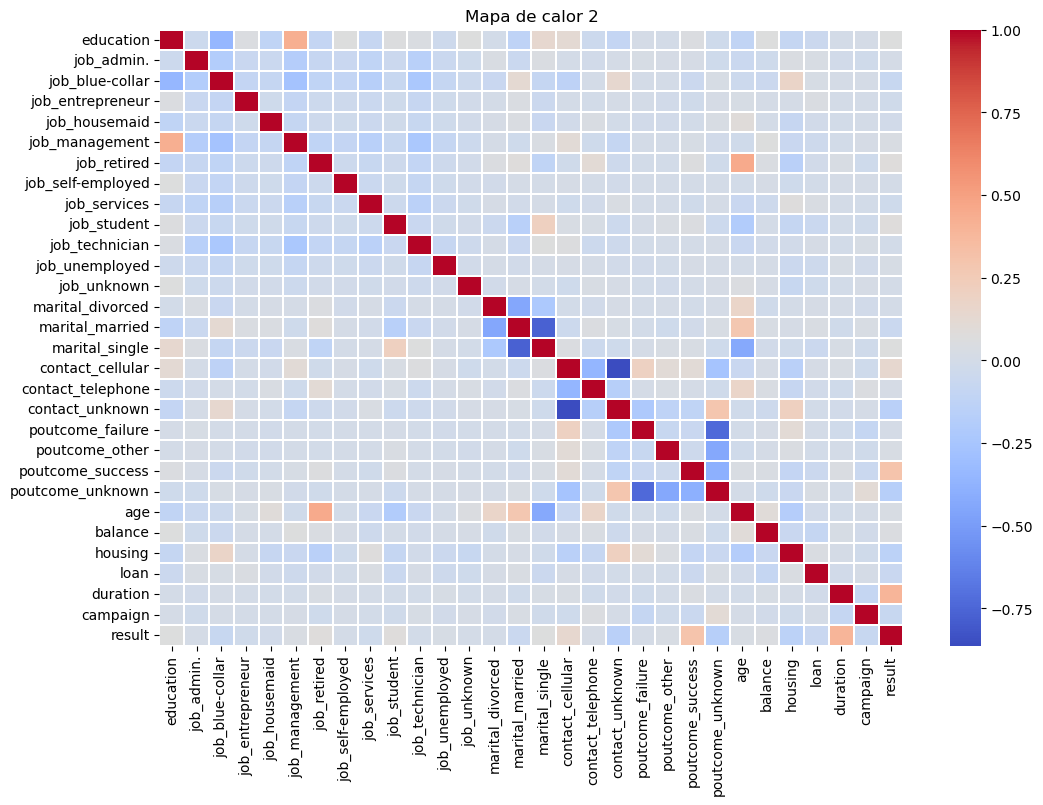

In [163]:
# Graficar Mapa de calor
fig, ax  = plt.subplots(figsize = (12,8))
plt.title("Mapa de calor 2")
sns.heatmap(dfCorrel, cmap= "coolwarm", linewidths = 0.30, annot=False)
# labels en español
#nuevas_etiquetas_x = nuevas_etiquetas_y = ['Edad', 'Saldo', 'Hipoteca', 'Prestamo','dia','duracion','campaña', 'resultado']
# cambiar labels
#ax.set_xticklabels(nuevas_etiquetas_x, rotation=90)
#ax.set_yticklabels(nuevas_etiquetas_y)
plt.show()

### Exportación de dataset

Se guarda el dataframe con los cambios de formato y eliminacion de variables para usarlo en la fase 2

In [170]:
dataframe_to_export = pd.concat([dataframe, Y], axis=1)

dataframe_to_export.to_csv("dataset_preparado.csv", sep=";", index=False)

In [171]:
dataframe_to_export.head()

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,poutcome,result
0,58,management,married,tertiary,2143,1,0,unknown,261,1,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,151,1,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,76,1,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,92,1,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,198,1,unknown,0


### Exportar pipeline

Se exporta/guarda el pipeline con los transformadores, para usarlo en la fase 2

In [168]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [169]:
guardarPipeline(pipe,'pipeline_bank_data')